In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_wine

# 1.Data load + EDA + Visualization 

In [2]:
#Data load
wine=load_wine(as_frame=True)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

- feature 13개는 wine에 들어있는 성분 함량을 의미하는것 같다.
- proline의 scale이 다른 feature들보다 매우 큰것을 확인할 수 있다.

In [3]:
#EDA를 하기위해 wine data를 df 라고 명칭.
df=wine.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
print('feature의 이름:\n',wine.feature_names)
#feature는 총 13개가 있다.

feature의 이름:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [5]:
df.describe()
#각 feature들의 통계량들은 다음과 같다. 서로 scale이 다른것을 확인할 수 있다.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
print("데이터 수:",len(df))

데이터 수: 178


In [7]:
df.isnull().sum()
#결측치는 없는것으로 확인된다.

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
df.dtypes
#feauter의 데이터타입은 모두 float64이다.

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

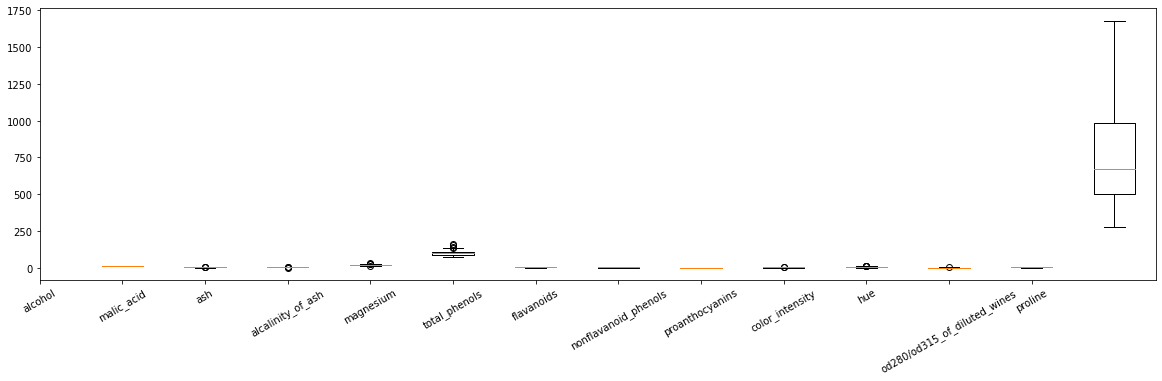

In [9]:
plt.figure(figsize=(20,5))
plt.boxplot(df)
plt.xticks(np.arange(0,13),wine.feature_names,rotation=30)
plt.show()

proline의 범위가 다른 feature들에 비해 매우 큰것을 알 수 있다. -> scaling의 필요성이 느껴졌다!

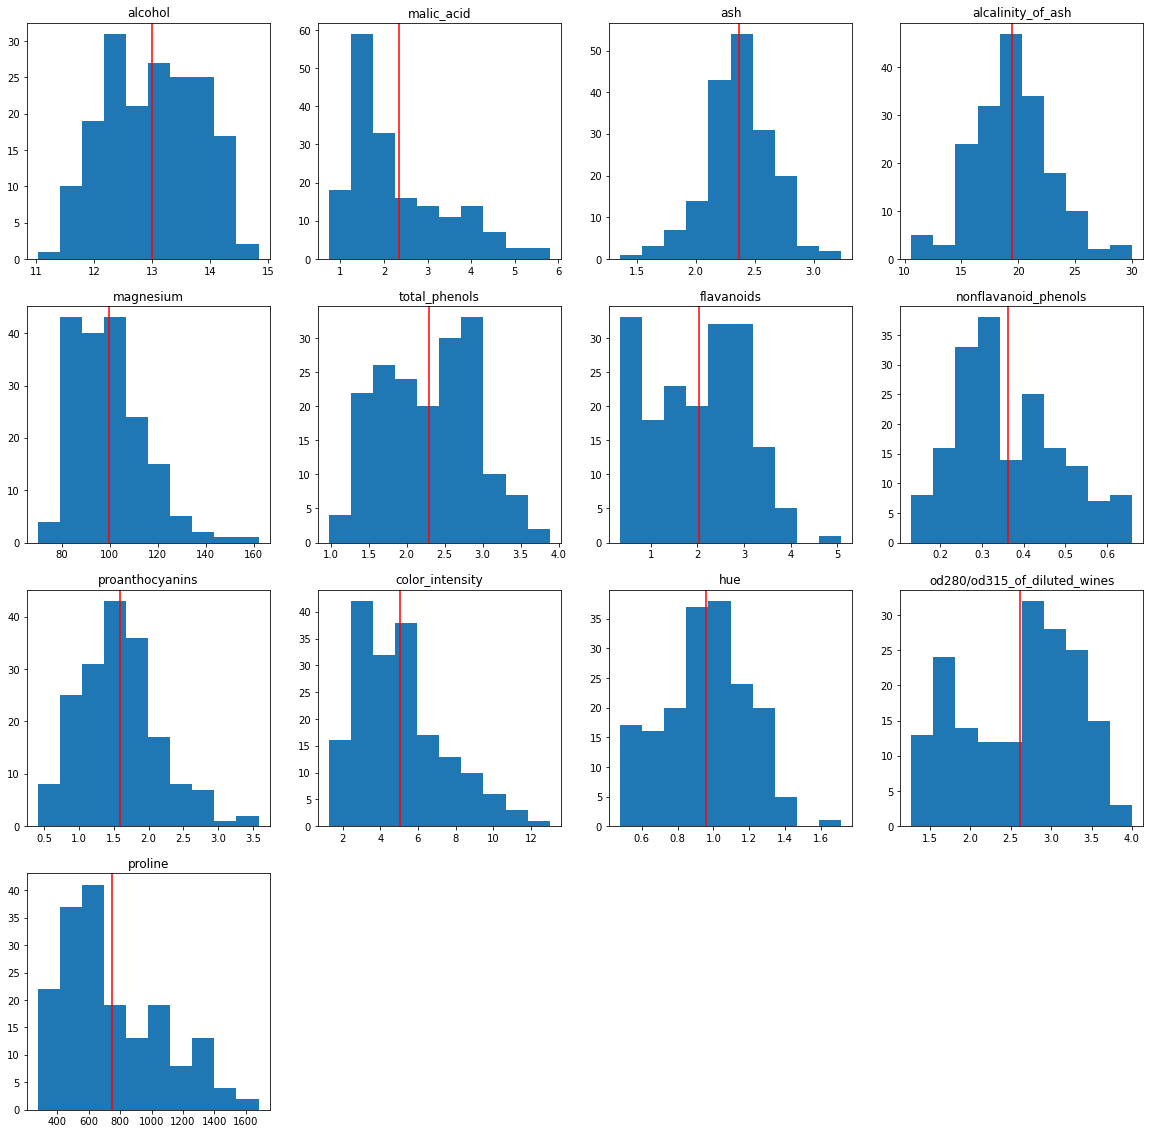

In [10]:
plt.figure(figsize=(20,20))
for i in range(1,14):
    plt.subplot(4,4,i)
    plt.hist(df[df.columns[i-1]])
    plt.title('{}'.format(df.columns[i-1]))
    plt.axvline(df[df.columns[i-1]].mean(),color='red')

plt.show()

대부분의 feature들이 평균 주위에 몰려있는 모습을 확인할 수 있다.

In [11]:
#상관계수 확인
corr_df= df.corr()

### correlation 이 0.4~0.7 정도면 양의 상관관계가 있다고 판단하였다.
### -0.7~-0.4 정도면 음의 상관관계가 있다고 판단하였다.

- 양의 상관관계를 가지는 변수들 쌍은 : (flavanoids,total_phenols), (alcohol,color_intensity), (alcohol,proline) , (ash, alcalinity_of_ash) 등등이 있다.

- 음의 상관관계를 가지는 변수들 쌍은 : (malic_acid,hue) ,(malic_acid,flavanoids), (alcalinity_of_ash, proline) ,(color_intensity,hue)등등이 있다.

# 2. Data preprocessing

In [12]:
wine = load_wine()

X_train = wine.data
print('train data 수:',len(X_train))

train data 수: 178


-clustering을 하기전에 scaling하는것이 매우 중요하다.

-위에서 각 feature의 히스토그램 분포들이 bell shape를 가지는 경향을 확인할 수 있었다. 또한 이상치가 많지 않다고 판단을 하였다.

-그러므로 나는 StandardScaler를 사용하는 것이 더 효과적일것이라고 생각하였다.

In [13]:
#Scaling 과정
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# 3. Clustering Algorithm(1)- KMeans Clustering

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
from sklearn.cluster import KMeans
'''StandardSclaer를 사용하여 진행''' 

inertia=[]
kmeans_sil_scores=[]
for n_cluster in range(2,14):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train_scaled)

    inertia.append(kmeans.inertia_)
    kmeans_sil_scores.append(silhouette_score(X_train_scaled, cluster_labels))
            
    

Text(0.5, 1.0, 'K-Means Inertia')

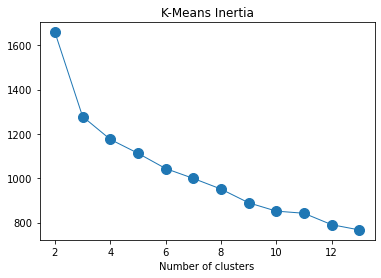

In [16]:
plt.plot(range(2,14),inertia,marker='o', lw=1,ms=10) 
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")
# clusters = 3일때, 꺽이는 지점인것을 알 수 있음

Text(0.5, 1.0, 'Silhouette Score')

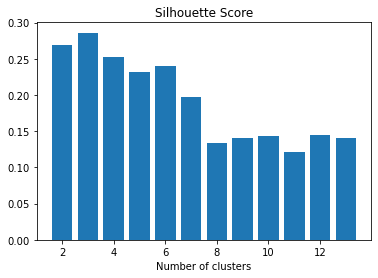

In [17]:
plt.bar(range(2,14),kmeans_sil_scores,)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")
# clusters =3 일때, silhouette score가 가장 높은것을 알 수 있음.

-silhoutte score가 절대적이지 않다! 그러므로 시각화를 진행하여 잘 분류되었는지 확인하려고 한다.

-inertia를 시각화 했을 때, cluster=3에서 완만해지는것을 확인할 수 있다.

-silhouette score를 시각화 했을 때, cluster=3이 가장 높은 것을 확인할 수 있다.

----> cluster 수가 3일때, kmeans clustering이 제일 잘 됐다고 판단하였다.

In [18]:
n_cluster=3
best_kmeans = KMeans(n_clusters=n_cluster,random_state=0)
cluster_labels=best_kmeans.fit_predict(X_train_scaled)
best_kmeans_sil_score=silhouette_score(X_train_scaled,cluster_labels)

print('Best kmeans clustering silhouette score:',best_kmeans_sil_score)

Best kmeans clustering silhouette score: 0.28594199657074876


# Clustering Algorithm(2)- Agglomerative Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

agg_sil_scores=[]
#ward,complete,average,single -> 선택
linkages = ['ward','complete','average','single']
for linkage in linkages:
    linkage_sil_scores =[]
    for n_cluster in range(2,14):
        agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
        agg.fit(X_train_scaled)
        cluster_labels=agg.labels_
        linkage_sil_scores.append(silhouette_score(X_train_scaled,cluster_labels))
    agg_sil_scores.append(linkage_sil_scores)


In [20]:
agg_sil_scores=np.stack(agg_sil_scores)
for i in range(4):
    print('{}의 최대 silhouette score :{}'.format(linkages[i],agg_sil_scores[i].max()))
#ward의 silhouette score가 가장 높음 -> ward를 선택

ward의 최대 silhouette score :0.2774439826952266
complete의 최대 silhouette score :0.20378689690677748
average의 최대 silhouette score :0.26629691418926393
single의 최대 silhouette score :0.22245060727650934


- agglomerative clustering에서는 linkage='ward'일때 성능이 가장 좋다는것을 확인하였다.

Text(0.5, 1.0, 'Silhouette Score')

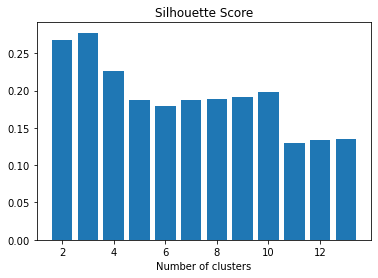

In [21]:
plt.bar(range(2,14),agg_sil_scores[0],)
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")

- cluster수가 3일때 silhouette score가 가장 높은것으로 확인할 수 있다.

In [22]:
n_cluster = 3
linkage='ward'
best_agg = AgglomerativeClustering(n_clusters=n_cluster,linkage=linkage)
best_agg.fit(X_train_scaled)
best_agg_sil_score=silhouette_score(X_train_scaled,best_agg.labels_)
print('Best agglomerative clustering silhouette score:',best_agg_sil_score)

Best agglomerative clustering silhouette score: 0.2774439826952266


# Clustering Algorithm(3) - DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

eps_list=[2,2.1,2.3,2.5,2.7,2.9,3,3.1,3.3,3.5,3.7,3.8,3.9]
min_samples=[3,4,5,6,7]

dbscan_sil_scores =[]

for eps in eps_list:
    dbscan_sil=[]
    for ms in min_samples:
        dbscan = DBSCAN(eps=eps,min_samples=ms)
        dbscan.fit(X_train_scaled)
        cluster_labels = dbscan.labels_
        dbscan_sil.append(silhouette_score(X_train_scaled,cluster_labels))
    dbscan_sil_scores.append(dbscan_sil)

dbscan_sil_scores=np.stack(dbscan_sil_scores)
dbscan_sil_scores

array([[ 0.03140745,  0.02856672, -0.03290614, -0.05077861, -0.02744825],
       [-0.07157341,  0.05456159,  0.04858047,  0.03195522,  0.01571294],
       [ 0.13823677,  0.19719621,  0.1736005 ,  0.16440586,  0.14616653],
       [ 0.13517425,  0.13517425,  0.1350038 ,  0.12663225,  0.11948839],
       [ 0.17040915,  0.17040915,  0.17040915,  0.15146862,  0.15146862],
       [ 0.21509618,  0.21509618,  0.21509618,  0.21509618,  0.2001964 ],
       [ 0.19109689,  0.21836446,  0.21836446,  0.21836446,  0.21836446],
       [ 0.20555614,  0.23413138,  0.23424254,  0.23424254,  0.23424254],
       [ 0.20555614,  0.23413138,  0.23413138,  0.23413138,  0.23424254],
       [ 0.21635484,  0.24976607,  0.24976607,  0.2471578 ,  0.2471578 ],
       [ 0.20544347,  0.24417004,  0.24417004,  0.24417004,  0.24417004],
       [ 0.20544347,  0.24417004,  0.24417004,  0.24417004,  0.24417004],
       [ 0.18273797,  0.22574488,  0.22574488,  0.22574488,  0.22574488]])

In [24]:
max_scores=[]
for i in range(len(eps_list)):
    max_scores.append(dbscan_sil_scores[i].max())
max_index=max_scores.index(max(max_scores))

print('silhouette score의 최대:',max_scores[max_index])
print('silhouette score가 최대일때, eps:',eps_list[max_index])

silhouette score의 최대: 0.24976607025828912
silhouette score가 최대일때, eps: 3.5


- silhouette score가 최대일때, eps=3.5, minsamples=4,5 이다.
- best_dbscan의 hyperparameter를 eps=3.5, minsamples=4로 정했다. 

In [25]:
best_dbscan=DBSCAN(eps=3.5,min_samples=4)
best_dbscan.fit(X_train_scaled)
best_dbscan_sil_score=silhouette_score(X_train_scaled,best_dbscan.labels_)
print('Best DBSCAN clustering silhouette score:',best_dbscan_sil_score)

Best DBSCAN clustering silhouette score: 0.24976607025828912


# 4. Best Clustering 찾기

<BarContainer object of 3 artists>

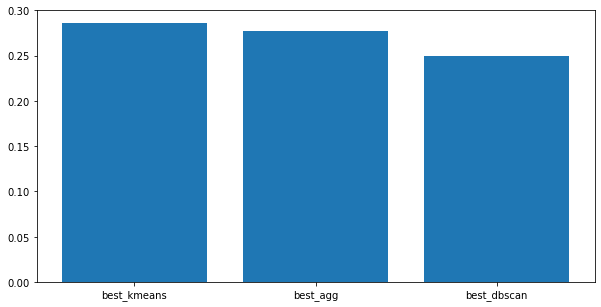

In [26]:
clusterings_sil_scores = [best_kmeans_sil_score,best_agg_sil_score,best_dbscan_sil_score]
cluster_names = ['best_kmeans','best_agg','best_dbscan']
plt.figure(figsize=(10,5))
plt.bar(cluster_names,clusterings_sil_scores,)

#### best clustering 끼리 비교했을 때, best_kmeans 의 silhouette score가 가장 높은것으로 확인할 수 있다.

# 5. Best KMeans cluster를 통한 특징 파악 및 시각화

### 선그래프를 사용하여 cluster 특징 시각화

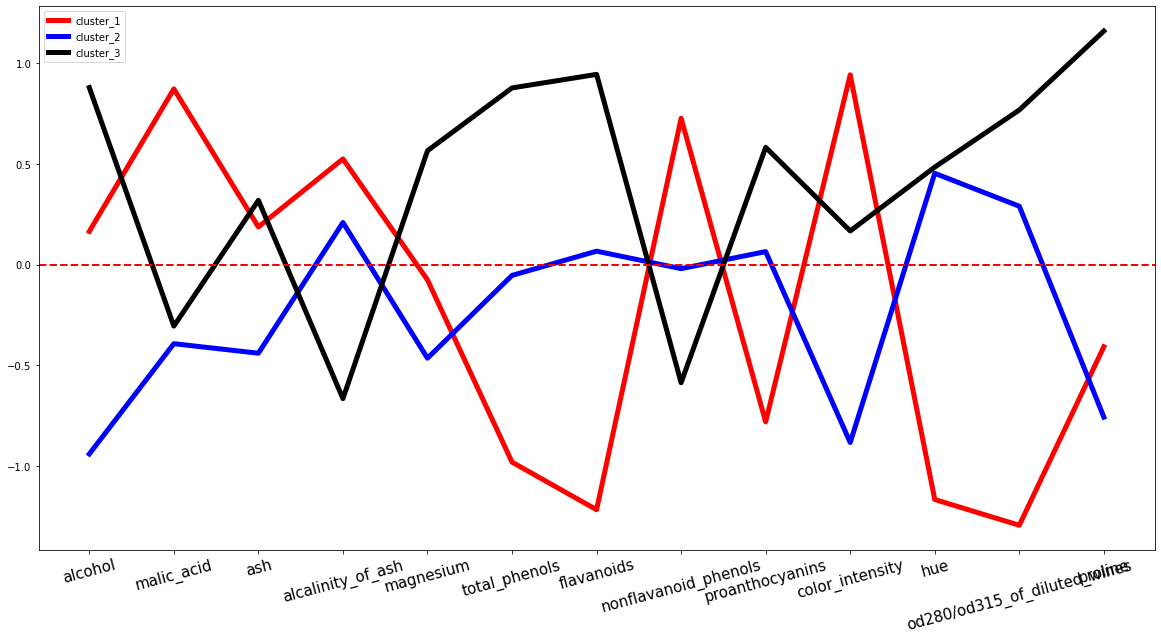

In [27]:
plt.figure(figsize=(20,10))

plt.plot(range(0,13),best_kmeans.cluster_centers_[0],linewidth=5, color='red', label='cluster_1')
plt.plot(range(0,13),best_kmeans.cluster_centers_[1], linewidth=5, color='blue', label='cluster_2')
plt.plot(range(0,13),best_kmeans.cluster_centers_[2], linewidth=5, color='black', label='cluster_3')
plt.legend()
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xticks(np.arange(0,13),wine.feature_names,rotation=15 ,fontsize=15)
plt.show()

In [28]:
best_df=pd.DataFrame(best_kmeans.cluster_centers_,columns=wine.feature_names,index=['cluster_1','cluster_2','cluster_3'])
best_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster_1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
cluster_2,-0.939003,-0.391966,-0.439201,0.208988,-0.463774,-0.053348,0.066904,-0.019822,0.064792,-0.882075,0.452982,0.289738,-0.756026
cluster_3,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347


기본적인 통계량과 선그래프를 통해 확인해 보았다.

- cluster_1은 malic_acid, alcalinity_of_ash, nonflavanoid_phenols,color_intensity 가 매우 높고 total_phenols, proanthocyanins, hue,od280/od315_of_diluted_wines 가 매우 낮은 특징을 확인할 수 있다.
- cluster_2는 alcohol,color_intensity,proline 이 매우 낮은 특징을 확인할 수 있다.
- cluster_3는 alcohol,total_phenols,flavanoids,od280/od315_of_diluted_wines,proline 이 매우 높고, alcalinity_of_ash,nonflavanoid_phenols 이 낮은 편인것을 확인할 수 있다.

- cluster_1 : 색이 진하고, 높아 단맛이 나는 적당한 알코올의 와인 -> 달달한 와인
- cluster_2 : 알코올이 매우 낮고, 색이 연한 와인 -> 무알콜 와인
- cluster_3 : 알코올이 매우 높고, proline 이 높아 아미노산 함량이 높음 -> 독한 와인

배경지식의 부족으로 적절한 cluster name은 주로 alcohol함량에 따라 정했다.

### 산점도를 이용하여 확인

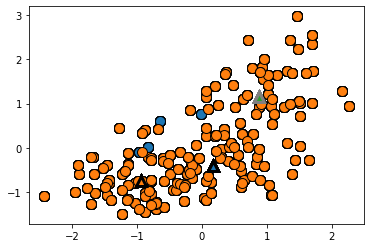

In [29]:
for i in range(13):
    mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:,12], cluster_labels, markers='o')
    mglearn.discrete_scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 12], range(n_cluster),
        markers='^',markeredgewidth=3)

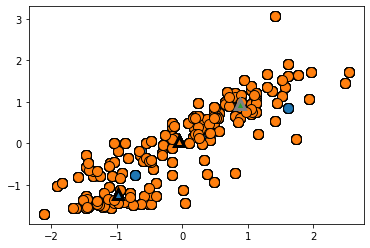

In [30]:
for i in range(13):
    mglearn.discrete_scatter(X_train_scaled[:, 5], X_train_scaled[:,6], cluster_labels, markers='o')
    mglearn.discrete_scatter(best_kmeans.cluster_centers_[:, 5], best_kmeans.cluster_centers_[:, 6], range(n_cluster),
        markers='^',markeredgewidth=3)

상관관계를 어느정도 가지고 있는 feature들을 시각화 해보면, 어느정도 군집화가 되는것을 확인할 수 있다.